# Predict the Onset of Diabetes Based on Diagnostic Measures (The Pima Indians Diabetes Database)

**Reference: https://www.kaggle.com/uciml/pima-indians-diabetes-database  **

## Step 1: Verify that all requires libraries can be imported  
**np.random.seed is for for reproducibility of results**

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
numpy.random.seed(7)

## Step 2: Load the data 
**Questions: **  
**- How many rows and columns does the data have?**

In [0]:
# load pima indians dataset
dataset = np.loadtxt("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv", delimiter=",")
print(dataset.shape)

## Step 3: Preview first 5 rows and all columns  
** dataset[0:5, :] = Rows 0 to 4 with all columns **

In [0]:
print(dataset[0:5, :])

## Step 4: Split the data (768 rows) into Training Set (first 700 rows) and Validation Set (remaining 68 rows)  
**- The first 8 columns (0 to 7) are our features used as input to the model**  
**- The last column (8) is the true label (diabetes or not) or the ground truth**    
#### Questions:
**- What is our input and output? **   
**- Why "0:8" in X and "8" in Y?   **
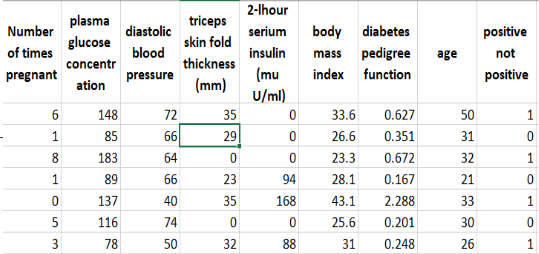


In [0]:
XTRAIN = dataset[:700,0:8]
YTRAIN = dataset[:700,8]
XVALIDATION = dataset[700:,0:8]
YVALIDATION = dataset[700:,8]

## Step 5: Review the dimensions of our Training Dataset and Validation Dataset
**Also preview some of the "input features" and "correct labels" for the datasets**
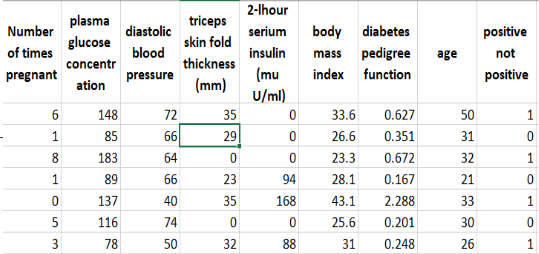

In [0]:
print(XTRAIN.shape)
print(YTRAIN.shape)
print(XVALIDATION.shape)
print(YVALIDATION.shape)
print(XTRAIN[0:3,])
print(YTRAIN[0:3])
print(XVALIDATION[0:3,])
print(YVALIDATION[0:3])

## Step 6: Create a neural network model with 12 neurons in layer 1, 8 neurons in layer 2, and 1 neuron as the last layer
**Questions:**  
**- Why is input_dim = 8? It can also be replaced with X[0, :]**


In [0]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

## Step 6: Check for proper neural connections by compiling the model

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Step 7: Do the Training (i.e. Fit the model)
**- We feed XTRAIN into the model and the model calculates errors using YTRAIN**  
**- In one epoch the model scans through the entire rows in the XTRAIN**  
**- Updating the number of epochs usually increases the accuracy of the model**  
**- To observe the accuracy on the VALIDATION data during the training, add ", validation_data = (XTEST, YTEST)" ** 

In [0]:
model.fit(XTRAIN, YTRAIN, epochs=15, batch_size=10)

## Step 8: Evaluate the model on the Training data (the same data we used to train the model)

In [0]:
scores = model.evaluate(XTRAIN, YTRAIN)
print(model.metrics_names)
print(scores)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

## Step 9: The real test of the model we trained
** We will evaluate the model on the "Unknown" dataset (i.e. validation dataset) **

In [0]:
scores = model.evaluate(XVALIDATION, YVALIDATION)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

## Step 10: Look into what the model actually predicted
** An example of what the model has predicted and comparison with the true classes **

In [0]:
print(XVALIDATION[0:5])
print(YVALIDATION[0:5])

In [0]:
prediction = model.predict(XVALIDATION)

In [0]:
print(prediction[0:5])

In [0]:
print(prediction[0:5].round())

## \[Optional\] Step 11: Accuracy is not sufficient to evaluate our model's ability to do binary classification  
** We can further evaluate the model using precision, recall, and F1-score **

In [0]:
accuracy = accuracy_score(YVALIDATION, prediction.round())
precision = precision_score(YVALIDATION, prediction.round())
recall = recall_score(YVALIDATION, prediction.round())
f1score = f1_score(YVALIDATION, prediction.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

#### precision = true positives / true positives + false positives (positive and negative predictive values)
#### recall = true positives / true positives + false negatives (true positive rate or sensitivity)
#### f1score = 2 * (precision x recall) / (precision + recall) 

## \[Optional\] Step 12: How can the model's performance be improved?  
** - Increase the number of epochs to 100 or 150 **  
** - Add more layers into the neural networks **  
** - Increase/Decrease the number of rows in the training/validation set **